In [ ]:
!pip install anomalib[full]
!pip install ollama==0.3
from anomalib.data import MVTec
from anomalib.models import Patchcore, EfficientAd
from anomalib.engine import Engine

def main():
    # List of flat surface categories to be used
    flat_categories = ["tile", "leather", "grid"]

    # Loop over each category and run training/prediction
    for cat in flat_categories:
        print(f"\n=== Training for category: {cat} ===")
        # Initialize the MVTec datamodule for the given category
        datamodule = MVTec(
            category=cat,
            train_batch_size=32,
            eval_batch_size=32,
            num_workers=8
        )

        # (Optional) Visualize a sample image:
        # datamodule.show_sample()

        # Initialize models with pretrained weights
        patchcore_model = Patchcore()
        efficientad_model = EfficientAd()

        # Create an Engine for training and prediction
        engine = Engine(max_epochs=10)

        # Train and predict with PatchCore
        print("Training PatchCore...")
        engine.fit(model=patchcore_model, datamodule=datamodule)
        patchcore_preds = engine.predict(model=patchcore_model, datamodule=datamodule)
        print("PatchCore training and prediction complete.")

        # Train and predict with EfficientAD
        print("Training EfficientAD...")
        engine.fit(model=efficientad_model, datamodule=datamodule)
        efficientad_preds = engine.predict(model=efficientad_model, datamodule=datamodule)
        print("EfficientAD training and prediction complete.")

if __name__ == "__main__":
    main()



ERROR: Operation cancelled by user

=== Training for category: tile ===


Estimated lambda after SGD: 88.8647


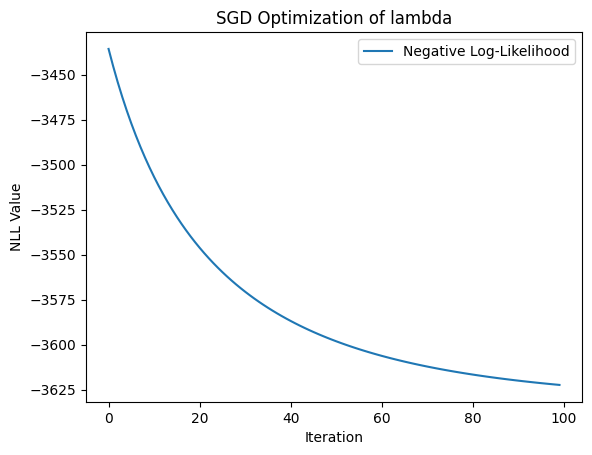

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def negative_log_likelihood(lambda_est, data):
    return -len(data) * np.log(lambda_est) + lambda_est * np.sum(data)

def sgd_mle(data, lambda_init=50, lr=0.1, num_iterations=100):
    lambda_est = lambda_init
    n = len(data)
    losses = []

    for i in range(num_iterations):
        grad = -n / lambda_est + np.sum(data)
        lambda_est -= lr * grad
        lambda_est = max(lambda_est, 1e-6)
        losses.append(negative_log_likelihood(lambda_est, data))

    return lambda_est, losses

lambda_est, loss_values = sgd_mle(interarrival_times)

print(f"Estimated lambda after SGD: {lambda_est:.4f}")

plt.plot(loss_values, label="Negative Log-Likelihood")
plt.xlabel("Iteration")
plt.ylabel("NLL Value")
plt.title("SGD Optimization of lambda")
plt.legend()
plt.show()


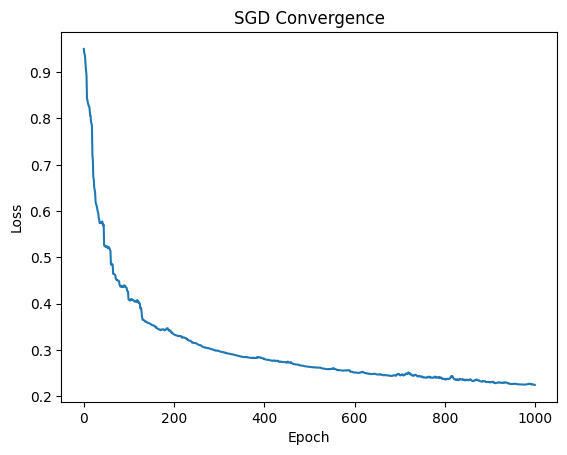

Final weights: [ 0.424862   -0.3259838  -0.62715559 -0.20133506 -0.51787949  0.42221836]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
m = 5000
x = np.linspace(0, 1, m)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, size=m)

M = 5
X = np.vstack([x**i for i in range(M+1)]).T

w = np.random.randn(M+1)
lr = 0.01
lambda_ = 0.1
epochs = 1000
loss_history = []

for epoch in range(epochs):
    i = np.random.randint(m)
    xi = X[i]
    yi = y[i]
    prediction = np.dot(xi, w)

    gradient = (prediction - yi) * xi + lambda_ * w
    w -= lr * gradient

    loss = (1/(2*m)) * np.sum((np.dot(X, w) - y)**2) + (lambda_/2) * np.sum(w**2)
    loss_history.append(loss)

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Convergence')
plt.show()

print("Final weights:", w)
